In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [60]:
df = pd.read_csv('d:/MY_REPOSITORY/depression_suicide_project/Pretrained_embedding_models/dataset/suicide/CSSRS/combined_CSSR_twitter_dataset.csv')

In [2]:
df = pd.read_csv('c:/Users/Teacher/Downloads/train.csv')

In [3]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
df

,id,Post,toxic,severe_toxic,obscene,threat,insult,identity_hate,class
0,c8781a76017dbcd9,"""\n\nThe earliest I found of the feather story...",0,0,0,0,0,0,0
1,18a3632473fd45f7,Best to leave my additions to the RDs alone. U...,0,0,0,0,0,0,0
2,d735ea99886c4f7a,"""\nOkay but this really belongs at Wikipedia:W...",0,0,0,0,0,0,0
3,77a7a52367898487,"""\nBut absent any """"settled outcome,"""" those w...",0,0,0,0,0,0,0
4,86e3969e809201f5,Please stop. If you continue to vandalize page...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,cb0a2dc55b7e5ac7,Which school did he attend? The school given i...,0,0,0,0,0,0,0
159567,3578672b5806df1a,"""\n\nElon refers to BFTS as Big FALCON Test St...",0,0,0,0,0,0,0
159568,f08a319158b9fa36,"""\nI've gone ahead and made this a redirect to...",0,0,0,0,0,0,0
159569,5bdee4fbb7ab8131,"On the contrary, I provide links to support my...",0,0,0,0,0,0,0


In [4]:
class_Labels = df.columns[2:]

class_Labels

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [5]:
df['labels'] = df[class_Labels].idxmax(axis=1)

df['labels'].value_counts()

labels
toxic            158640
obscene             523
insult              329
identity_hate        54
threat               25
Name: count, dtype: int64

In [47]:
df[df['obscene']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,toxic
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,toxic
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,toxic
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,toxic
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,toxic
...,...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,Fat piece of shit \n\nyou obese piece of shit....,1,0,1,0,1,0,toxic
159493,fef142420a215b90,FUCKING FAGGOT \n\nLOLWAT.,1,0,1,0,1,0,toxic
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,toxic
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,toxic


In [6]:
row_sum = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
df.loc[row_sum == 0, 'labels'] = 'Non-toxic'

df=df.rename(columns={'comment_text': 'Post', 'labels':'class'})
df.columns

Index(['id', 'Post', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'class'],
      dtype='object')

In [9]:
# This part is need for the Label encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df = df.sample(frac=1).reset_index(drop=True)

LE.classes_

array(['Non-toxic', 'identity_hate', 'insult', 'obscene', 'threat',
       'toxic'], dtype=object)

In [15]:
df['class'].value_counts()

class
5    15294
3      523
2      329
1       54
4       25
Name: count, dtype: int64

In [11]:
# removing not interested categories
df = df[df['class']!=0]
df['class'].value_counts()

class
5    15294
3      523
2      329
1       54
4       25
Name: count, dtype: int64

In [16]:
# Split data into features (X) and labels (y)
X = df['Post']
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define classifiers with specified parameters
classifiers = {
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
#     'Gaussian Process': GaussianProcessClassifier(),
#     'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}


In [24]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [32]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('smote', SMOTE(random_state=42)),  # SMOTE for oversampling
        ('classifier', clf)
    ])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
## Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print classification report for detailed metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print()
    
        # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Training and evaluating K Nearest Neighbors...


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

In [40]:
# Define classifiers with specified parameters
classifiers = {
#     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
#     'SVM': SVC(degree=2, gamma=0.7, kernel='rbf'),
#     'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2),
#     'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
#     'Neural Net (Multi-layer perceptron)': MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
#     'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB(var_smoothing=1e-9)
}

In [41]:
# Create pipeline for each classifier
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('to_dense', DenseTransformer()), 
        ('classifier', clf)
    ])

C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9384
F1 Score: 0.9085
Precision: 0.8805
Recall: 0.9384


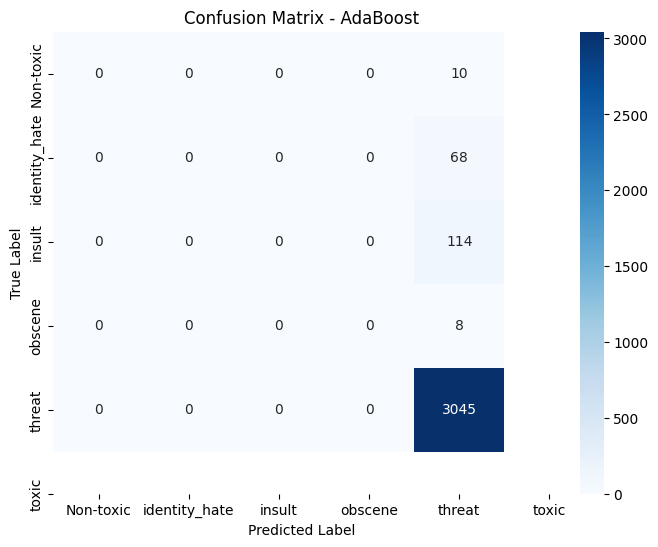

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Transform test data using CountVectorizer and TfidfTransformer
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict labels using the trained classifier
y_pred = clf.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

    # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer


# # Sample DataFrame with text data and corresponding labels
# data = {
#     'text': ['This is a good day', 'I am happy', 'This is a bad day', 'I am sad'],
#     'label': [1, 2, 0, 2]  # Multiclass labels
# }
# df = pd.DataFrame(data)

# # Split data into features (X) and labels (y)
# X = df['text']
# y = df['label']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()

transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Define classifiers
classifiers = {
    'Gaussian Naive Bayes': GaussianNB()
}

# Create pipelines for each classifier with TF-IDF vectorization
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('dense', transformer),
        ('classifier', clf)
    ])

# Train and evaluate each classifier
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(cm)
    print()

Training and evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.8875, F1 Score: 0.8820, Precision: 0.8865, Recall: 0.8875
Gaussian Naive Bayes - Confusion Matrix:
[[142   0   7   1   1]
 [  0 136   6   2   0]
 [  2   2 134   3   3]
 [  1   2  20 168   2]
 [  0   1  15   6   4]]



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Models to evaluate
models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC(degree=2, gamma=0.7, kernel='rbf'),
    RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features='sqrt'),
    MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(15,)),
]

CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('smote', SMOTE(random_state=12)),
        ('classifier', model)
    ])
    accuracies = cross_val_score(pipeline, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])




ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 339, in _fit
    self._validate_steps()
  File "C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=12)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't


In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Print average accuracy scores
print(cv_df.groupby('model_name').accuracy.mean())